![image.png](../background_photos/libs_12_squirelik.jpg)
Կովկասյան սկյուռ, [լուսանկարի հղումը](https://www.facebook.com/photo.php?fbid=949574953405314&set=pb.100050584535273.-2207520000&type=3), Հեղինակ՝ [Berta Martirosyan](https://bertamartirosyan.com/)




<a href="ToDo" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> (ToDo)

# 📌 Նկարագիր
[📚 Ամբողջական նյութը](12_sql.ipynb)

[📺Տեսանյութը](https://www.youtube.com/watch?v=zMeKyFWTe10)

Աղյուսակային տվյալները `csv`-ով պահելը երբեմն աշխարհի ամենալավ միտքը չի։ Ոչ էլ `parquet` պահելն ա միշտ լավագույն տարբերակը։ ՄԼ-ի կոնտեքստում երբ-որ ինչ-որ տվյալներ արդեն կան ու իրանց պետք ա վերլուծենք՝ բան չունեմ ասելու, ընտիր ֆորմատներ են, բայց եթե գնանք ավելի շատ դեպի backend development որտեղ որ պահվում են օրինակի համար կայքում գրանցված մարդկանց տվյալներ՝ այ ըտեղ արդեն կարիք ա գալիս դինամիկ համակարգերի որ թույլ կտան արագ ու էժան պահել ու ստանալ մեր ուզած տվյալները։ 

Էս նյութում ծանոթանում ենք SQL (Structured Query Language)-ի հետ, ու սովորում հիմնական գրադարանները տվյալների բազաների հետ փոխազդելու։ 

Ծանոթանում ենք` Select, Where, Order by, Limit, Group by, Join, Subqueries, Having հրամանների հետ ու խառը ֆունկցիաների հետ։

#### Նշում
Չենք ծանոթանում բազաների տեսակներին, կամ նրան թե ոնց ճիշտ դիզայն անել բազան։ Ուղղակի թեթև ծանոթացում SQL-ին։

#### 🏡 Տնայինի առաջարկ
Բռաուզեռի պատմությունը բազայով ա պահվում ու լոկալ հասանելիություն ունենք իրանց։ Կարաք կարդաք աղյուսակները, վերլուծեք հենց ձեր պատմությունը, եթե հավեսի ընկնեք նույնիսկ կարաք AI API-ի request անեք, հղումները տաք ասեք դնի ինչ-որ կատեգորիայի մեջ (աշխատանք, հանգիստ, Աստված գիտի ինչ ․․․)

Ավելի մանրամասն կարաք նյութի ներքևում (գործնական սեկցիայում) ծանոթանաք միկրո օրինակի ու հղումների համար

# 📚 Նյութը

SQL - Structured Query Language

https://www.programiz.com/sql/online-compiler

In [ ]:
import sqlite3 # built in
import pandas as pd
from pathlib import Path

data_dir = Path('dbs')

customers = pd.read_csv(data_dir / 'customers.csv')
orders = pd.read_csv(data_dir / 'orders.csv')
products = pd.read_csv(data_dir / 'products.csv')

# Convert date columns
customers['registration_date'] = pd.to_datetime(customers['registration_date'])
orders['order_date'] = pd.to_datetime(orders['order_date'])
    
# Create in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Load data into SQLite
customers.to_sql('customers', conn, index=False, if_exists='replace')
orders.to_sql('orders', conn, index=False, if_exists='replace')
products.to_sql('products', conn, index=False, if_exists='replace')

print("\n👥 Customers:")
customers.head()


👥 Customers:


,customer_id,name,email,country,city,age,registration_date,customer_segment
0,1,Armen Sargsyan,armen.s@armmail.am,Armenia,Yerevan,56,2023-01-01 00:00:00.000000000,Basic
1,2,Anahit Hakobyan,anahit.h@haypost.am,Armenia,Gyumri,46,2023-02-08 10:06:18.947368421,Premium
2,3,Davit Grigoryan,davit.g@arca.am,Armenia,Vanadzor,32,2023-03-18 20:12:37.894736842,Basic
3,4,Sona Petrosyan,sona.p@armmail.am,Armenia,Yerevan,60,2023-04-26 06:18:56.842105264,Standard
4,5,Vahram Manukyan,vahram.m@ucom.am,Armenia,Kapan,25,2023-06-03 16:25:15.789473684,Standard


In [ ]:
print("\n🛒 Orders:")
orders.head()


🛒 Orders:


,order_id,customer_id,amount,order_date,product_category,payment_method,shipping_method,order_status,discount_applied
0,101,1,75.46,2024-03-21,Armenian Literature,Idram,HayPost Standard,Completed,0
1,102,1,87.25,2024-05-14,Traditional Crafts,ARCA Card,HayPost Standard,Completed,5
2,103,1,69.19,2024-06-20,Armenian Literature,ACBA Bank Transfer,HayPost Standard,Processing,10
3,104,2,239.62,2024-09-11,Sports Equipment,Cash,HayPost Standard,Completed,0
4,105,2,372.74,2024-12-17,Food & Delicacies,Cash,Yerevan Express,Completed,5


In [74]:
print("\n📦 Products:")
products.head()


📦 Products:


,product_id,product_name,category,price,stock_quantity,supplier
0,1,Handcrafted Armenian Duduk,Musical Instruments,450.0,22,ArmenianHeritage
1,2,Professional Zurna,Musical Instruments,280.0,8,AraratWines
2,3,Traditional Oud,Musical Instruments,350.0,29,AraratWines
3,4,Armenian Kanun,Musical Instruments,750.0,18,ArmenianHeritage
4,5,Dhol Drum Set,Musical Instruments,320.0,13,ArmenianHeritage


## 1. Basic `SELECT` – view all rows

In [80]:
# Basic SELECT query
query = """
SELECT name, email, country, city, age
FROM customers
"""

# * - means select all

all_customers = pd.read_sql_query(query, conn) # We just pass the conn, not the df
all_customers

,name,email,country,city,age
0,Armen Sargsyan,armen.s@armmail.am,Armenia,Yerevan,56
1,Anahit Hakobyan,anahit.h@haypost.am,Armenia,Gyumri,46
2,Davit Grigoryan,davit.g@arca.am,Armenia,Vanadzor,32
3,Sona Petrosyan,sona.p@armmail.am,Armenia,Yerevan,60
4,Vahram Manukyan,vahram.m@ucom.am,Armenia,Kapan,25
5,Karine Abrahamyan,karine.a@haypost.am,Armenia,Yerevan,38
6,Tigran Avetisyan,tigran.av@gmail.com,Armenia,Goris,56
7,Lilit Gevorgyan,lilit.g@armmail.am,Armenia,Sisian,36
8,Hayk Khachatryan,hayk.kh@ucom.am,Armenia,Yerevan,40
9,Lusine Vardanyan,lusine.v@arca.am,Armenia,Alaverdi,28


## 2. Filtering rows with `WHERE`

In [ ]:
# SQL with WHERE clause - Yerevan customers
query_country = """
SELECT name, email, country, city, age
FROM customers 
WHERE city = 'Yerevan'
ORDER BY age DESC
"""

result = pd.read_sql_query(query_country, conn)
print(result)
# ORDER BY age DESC;

# print("\nPandas equivalent:")
# pandas_result = customers.loc[customers['city'] == 'Yerevan', 
#                               ['name', 'email', 'country', 'city', 'age']]
# print(pandas_result)

                name                 email  country     city  age
0     Sona Petrosyan     sona.p@armmail.am  Armenia  Yerevan   60
1     Armen Sargsyan    armen.s@armmail.am  Armenia  Yerevan   56
2    Gagik Stepanyan       gagik.s@arca.am  Armenia  Yerevan   41
3   Hayk Khachatryan       hayk.kh@ucom.am  Armenia  Yerevan   40
4  Karine Abrahamyan   karine.a@haypost.am  Armenia  Yerevan   38
5   Astghik Torosyan  astghik.t@haypost.am  Armenia  Yerevan   19


In [86]:
# SQL with WHERE clause - Premium customers under 40
query_segment = """
SELECT name, customer_segment, age, city
FROM customers 
WHERE customer_segment = 'Premium' AND age < 40;
"""
# same way we can write OR

print("💎 Young Premium Customers:")
result = pd.read_sql_query(query_segment, conn)
print(result)

💎 Young Premium Customers:
                name customer_segment  age      city
0  Karine Abrahamyan          Premium   38   Yerevan
1   Lusine Vardanyan          Premium   28  Alaverdi


## 3. Sorting results with `ORDER BY`

In [88]:
# SQL with ORDER BY - Top highest value orders
query_orders_desc = """
SELECT order_id, customer_id, amount, product_category, order_date
FROM orders 
ORDER BY amount DESC
LIMIT 10
"""
# LIMIT 10;
# DESC - descending order

print("💰 Top 10 Highest Value Orders:")
result = pd.read_sql_query(query_orders_desc, conn)
print(result)

# print("\nPandas equivalent:")
# pandas_result = orders.nlargest(10, 'amount')[['order_id', 'customer_id', 'amount', 'product_category', 'order_date']]
# print(pandas_result)

💰 Top 10 Highest Value Orders:
   order_id  customer_id  amount     product_category           order_date
0       124            7  492.61  Armenian Literature  2024-02-07 00:00:00
1       127            7  488.33  Armenian Literature  2024-10-28 00:00:00
2       119            6  458.92     Armenian Spirits  2024-02-06 00:00:00
3       154           13  407.96   Traditional Crafts  2024-05-12 00:00:00
4       123            6  402.33  Musical Instruments  2024-05-14 00:00:00
5       125            7  384.12  Musical Instruments  2024-10-10 00:00:00
6       105            2  372.74    Food & Delicacies  2024-12-17 00:00:00
7       145           10  369.08  Musical Instruments  2024-04-10 00:00:00
8       121            6  353.24     Sports Equipment  2024-12-05 00:00:00
9       122            6  306.95     Sports Equipment  2024-11-05 00:00:00


## 4. Aggregation with `GROUP BY`

In [90]:
# Customer analysis by city
query_by_city = """
SELECT city, 
       COUNT(*) as customer_count,
       AVG(age) as avg_age
FROM customers
GROUP BY city
ORDER BY customer_count DESC;
"""

print("🌍 Customer Analysis by City:")
result = pd.read_sql_query(query_by_city, conn)
print(result)

🌍 Customer Analysis by City:
            city  customer_count    avg_age
0        Yerevan               6  42.333333
1       Vanadzor               1  32.000000
2    Stepanakert               1  53.000000
3         Sisian               1  36.000000
4         Shushi               1  39.000000
5          Sevan               1  41.000000
6          Kapan               1  25.000000
7        Hrazdan               1  57.000000
8         Gyumri               1  46.000000
9          Goris               1  56.000000
10       Dilijan               1  20.000000
11  Charentsavan               1  41.000000
12      Artashat               1  28.000000
13      Alaverdi               1  28.000000
14       Abovyan               1  61.000000


In [92]:
# Sales performance by product category
query_by_category = """
SELECT product_category,
       COUNT(*) as order_count,
       SUM(amount) as total_revenue,
       ROUND(AVG(amount), 1) as avg_order_value,
       MAX(amount) as highest_order
       
FROM orders
GROUP BY product_category
ORDER BY total_revenue DESC;
"""

print("📦 Sales Performance by Product Category:")
result = pd.read_sql_query(query_by_category, conn)
result

📦 Sales Performance by Product Category:


,product_category,order_count,total_revenue,avg_order_value,highest_order
0,Armenian Literature,14,2610.57,186.5,492.61
1,Musical Instruments,9,2076.15,230.7,402.33
2,Sports Equipment,11,1720.80,156.4,353.24
3,Armenian Spirits,12,1590.31,132.5,458.92
4,Traditional Crafts,9,1268.83,141.0,407.96
5,Food & Delicacies,7,1215.00,173.6,372.74
6,Traditional Games,10,959.03,95.9,165.26
7,Armenian Wines,5,637.42,127.5,223.12
8,Traditional Clothing,5,635.76,127.2,193.81


## 5. Joining tables

In [93]:
customers

,customer_id,name,email,country,city,age,registration_date,customer_segment
0,1,Armen Sargsyan,armen.s@armmail.am,Armenia,Yerevan,56,2023-01-01 00:00:00.000000000,Basic
1,2,Anahit Hakobyan,anahit.h@haypost.am,Armenia,Gyumri,46,2023-02-08 10:06:18.947368421,Premium
2,3,Davit Grigoryan,davit.g@arca.am,Armenia,Vanadzor,32,2023-03-18 20:12:37.894736842,Basic
3,4,Sona Petrosyan,sona.p@armmail.am,Armenia,Yerevan,60,2023-04-26 06:18:56.842105264,Standard
4,5,Vahram Manukyan,vahram.m@ucom.am,Armenia,Kapan,25,2023-06-03 16:25:15.789473684,Standard
5,6,Karine Abrahamyan,karine.a@haypost.am,Armenia,Yerevan,38,2023-07-12 02:31:34.736842104,Premium
6,7,Tigran Avetisyan,tigran.av@gmail.com,Armenia,Goris,56,2023-08-19 12:37:53.684210528,Premium
7,8,Lilit Gevorgyan,lilit.g@armmail.am,Armenia,Sisian,36,2023-09-26 22:44:12.631578948,Standard
8,9,Hayk Khachatryan,hayk.kh@ucom.am,Armenia,Yerevan,40,2023-11-04 08:50:31.578947368,Standard
9,10,Lusine Vardanyan,lusine.v@arca.am,Armenia,Alaverdi,28,2023-12-12 18:56:50.526315788,Premium


In [94]:
orders

,order_id,customer_id,amount,order_date,product_category,payment_method,shipping_method,order_status,discount_applied
0,101,1,75.46,2024-03-21,Armenian Literature,Idram,HayPost Standard,Completed,0
1,102,1,87.25,2024-05-14,Traditional Crafts,ARCA Card,HayPost Standard,Completed,5
2,103,1,69.19,2024-06-20,Armenian Literature,ACBA Bank Transfer,HayPost Standard,Processing,10
3,104,2,239.62,2024-09-11,Sports Equipment,Cash,HayPost Standard,Completed,0
4,105,2,372.74,2024-12-17,Food & Delicacies,Cash,Yerevan Express,Completed,5
...,...,...,...,...,...,...,...,...,...
77,178,19,69.33,2024-04-20,Armenian Spirits,Cash,HayPost Standard,Completed,0
78,179,19,111.75,2024-07-02,Armenian Literature,ACBA Bank Transfer,Same Day Delivery,Completed,0
79,180,19,75.34,2024-10-03,Armenian Wines,ARCA Card,HayPost Standard,Completed,0
80,181,20,99.51,2024-03-18,Sports Equipment,ARCA Card,HayPost Standard,Completed,5


In [95]:
# Basic JOIN - connecting customers with their orders
# JOIN combines data from multiple tables based on a relationship
# INNER JOIN: only shows records that exist in BOTH tables

query_customer_orders = """
SELECT c.name, c.country, c.customer_segment,
       o.order_id, o.amount, o.product_category, o.order_date
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
WHERE o.amount > 150
ORDER BY o.order_date DESC
LIMIT 10;
"""

print("💰 High-Value Customer Orders (>$150):")
print("This shows customers who made orders over $150")
print("JOIN connects customers table (c) with orders table (o)")
print("ON c.customer_id = o.customer_id - this is the relationship")
print()
result = pd.read_sql_query(query_customer_orders, conn)
result

💰 High-Value Customer Orders (>$150):
This shows customers who made orders over $150
JOIN connects customers table (c) with orders table (o)
ON c.customer_id = o.customer_id - this is the relationship



,name,country,customer_segment,order_id,amount,product_category,order_date
0,Arusyak Mkrtchyan,Armenia,Standard,159,161.63,Armenian Literature,2024-12-26 00:00:00
1,Anahit Hakobyan,Armenia,Premium,105,372.74,Food & Delicacies,2024-12-17 00:00:00
2,Karine Abrahamyan,Armenia,Premium,121,353.24,Sports Equipment,2024-12-05 00:00:00
3,Karine Abrahamyan,Armenia,Premium,122,306.95,Sports Equipment,2024-11-05 00:00:00
4,Gagik Stepanyan,Armenia,Standard,162,154.36,Musical Instruments,2024-10-31 00:00:00
5,Tigran Avetisyan,Armenia,Premium,127,488.33,Armenian Literature,2024-10-28 00:00:00
6,Lilit Gevorgyan,Armenia,Standard,130,156.34,Armenian Spirits,2024-10-25 00:00:00
7,Tigran Avetisyan,Armenia,Premium,125,384.12,Musical Instruments,2024-10-10 00:00:00
8,Tigran Avetisyan,Armenia,Premium,129,223.12,Armenian Wines,2024-10-06 00:00:00
9,Anahit Hakobyan,Armenia,Premium,104,239.62,Sports Equipment,2024-09-11 00:00:00


In [96]:
# Three-table JOIN - customers, orders, and products
# This connects THREE tables together to get complete information

query_three_tables = """
SELECT c.name, c.city, c.customer_segment,
       o.order_id, o.amount, o.order_date,
       p.product_name, p.price, p.supplier
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN products p ON o.product_category = p.category
WHERE c.country = 'Armenia' AND o.order_status = 'Completed'
ORDER BY o.amount DESC
LIMIT 8;
"""

print("🇦🇲 Detailed Armenian Customer Purchases:")
print("This query connects THREE tables:")
print("1. customers (c) -> orders (o): ON c.customer_id = o.customer_id")
print("2. orders (o) -> products (p): ON o.product_category = p.category")
print("We get customer info + order details + product details in one result!")
print()
result = pd.read_sql_query(query_three_tables, conn)
result

🇦🇲 Detailed Armenian Customer Purchases:
This query connects THREE tables:
1. customers (c) -> orders (o): ON c.customer_id = o.customer_id
2. orders (o) -> products (p): ON o.product_category = p.category
We get customer info + order details + product details in one result!



,name,city,customer_segment,order_id,amount,order_date,product_name,price,supplier
0,Tigran Avetisyan,Goris,Premium,127,488.33,2024-10-28 00:00:00,Armenian History by Hovhannes Tumanyan,39.99,AraratWines
1,Tigran Avetisyan,Goris,Premium,127,488.33,2024-10-28 00:00:00,Artsakh Heritage Album,49.99,ArmenianHeritage
2,Tigran Avetisyan,Goris,Premium,127,488.33,2024-10-28 00:00:00,Komitas Sacred Music Collection,29.99,YerevanCrafts
3,Tigran Avetisyan,Goris,Premium,127,488.33,2024-10-28 00:00:00,Traditional Armenian Recipes,42.99,ArmenianHeritage
4,Tigran Avetisyan,Goris,Premium,127,488.33,2024-10-28 00:00:00,Western Armenian Grammar Book,35.99,ArmenianHeritage
5,Karine Abrahamyan,Yerevan,Premium,123,402.33,2024-05-14 00:00:00,Armenian Kanun,750.00,ArmenianHeritage
6,Karine Abrahamyan,Yerevan,Premium,123,402.33,2024-05-14 00:00:00,Dhol Drum Set,320.00,ArmenianHeritage
7,Karine Abrahamyan,Yerevan,Premium,123,402.33,2024-05-14 00:00:00,Handcrafted Armenian Duduk,450.00,ArmenianHeritage


### 🎯 JOIN Types Explained

| JOIN Type | What it returns | When to use |
|-----------|-----------------|-------------|
| **INNER JOIN** | Only matching records from both tables | When you want records that exist in both tables |
| **LEFT JOIN** | All records from left table + matching from right | When you want all customers, even without orders |
| **RIGHT JOIN** | All records from right table + matching from left | When you want all orders, even if customer deleted |
| **FULL OUTER** | All records from both tables | When you want everything (rarely used) |

### 💡 Real-world examples:
- **INNER JOIN**: "Show me customers who have made orders"
- **LEFT JOIN**: "Show me all customers and their orders (if any)"
- **RIGHT JOIN**: "Show me all orders and customer info (if available)"

The key is understanding what data you want to include or exclude!

In [97]:
# Revenue analysis by customer segment
query_by_segment = """
SELECT c.customer_segment,
       COUNT(o.order_id) as total_orders,
       SUM(o.amount) as total_spent,
       AVG(o.amount) as avg_per_order
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_segment
ORDER BY total_spent DESC;
"""

print("💎 Revenue Analysis by Customer Segment:")
result = pd.read_sql_query(query_by_segment, conn)
print(result)

💎 Revenue Analysis by Customer Segment:
  customer_segment  total_orders  total_spent  avg_per_order
0          Premium            18      5947.48     330.415556
1         Standard            43      5554.27     129.169070
2            Basic            21      1212.12      57.720000


## 6. Subqueries / Common Table Expressions (CTEs)

In [98]:
orders

,order_id,customer_id,amount,order_date,product_category,payment_method,shipping_method,order_status,discount_applied
0,101,1,75.46,2024-03-21,Armenian Literature,Idram,HayPost Standard,Completed,0
1,102,1,87.25,2024-05-14,Traditional Crafts,ARCA Card,HayPost Standard,Completed,5
2,103,1,69.19,2024-06-20,Armenian Literature,ACBA Bank Transfer,HayPost Standard,Processing,10
3,104,2,239.62,2024-09-11,Sports Equipment,Cash,HayPost Standard,Completed,0
4,105,2,372.74,2024-12-17,Food & Delicacies,Cash,Yerevan Express,Completed,5
...,...,...,...,...,...,...,...,...,...
77,178,19,69.33,2024-04-20,Armenian Spirits,Cash,HayPost Standard,Completed,0
78,179,19,111.75,2024-07-02,Armenian Literature,ACBA Bank Transfer,Same Day Delivery,Completed,0
79,180,19,75.34,2024-10-03,Armenian Wines,ARCA Card,HayPost Standard,Completed,0
80,181,20,99.51,2024-03-18,Sports Equipment,ARCA Card,HayPost Standard,Completed,5


In [99]:
query = """
SELECT customer_id, SUM(amount) AS total_spent
FROM orders
GROUP BY customer_id
"""
sql_result = pd.read_sql_query(query, conn)
print("SQL Result:")
sql_result

SQL Result:


,customer_id,total_spent
0,1,231.90
1,2,612.36
2,3,326.27
3,4,253.48
4,5,407.87
5,6,1813.02
6,7,2014.36
7,8,1063.62
8,9,950.09
9,10,920.34


In [100]:
# SQL with Common Table Expression (CTE)
query = """
WITH totals AS (
    SELECT customer_id, SUM(amount) AS total_spent
    FROM orders
    GROUP BY customer_id
)
SELECT c.name, t.total_spent
FROM customers AS c
JOIN totals AS t ON c.customer_id = t.customer_id
ORDER BY t.total_spent DESC;
"""

sql_result = pd.read_sql_query(query, conn)
print("SQL Result:")
sql_result

SQL Result:


,name,total_spent
0,Tigran Avetisyan,2014.36
1,Karine Abrahamyan,1813.02
2,Lilit Gevorgyan,1063.62
3,Hayk Khachatryan,950.09
4,Lusine Vardanyan,920.34
5,Arman Ghukasyan,827.87
6,Gagik Stepanyan,688.84
7,Arusyak Mkrtchyan,649.70
8,Anahit Hakobyan,612.36
9,Ruben Danielyan,587.40


## 7. HAVING clause - Filtering grouped results

In [104]:
# HAVING clause - filter after grouping
query_big_spenders = """
SELECT 
    c.name,
    SUM(o.amount) as total_spent
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
WHERE c.city = "Yerevan"
GROUP BY c.customer_id, c.name
HAVING SUM(o.amount) > 500
ORDER BY total_spent DESC;
"""

print("\nBig spenders (total > $500):")
pd.read_sql_query(query_big_spenders, conn)



Big spenders (total > $500):


,name,total_spent
0,Karine Abrahamyan,1813.02
1,Hayk Khachatryan,950.09
2,Gagik Stepanyan,688.84


## 8. Data Modification - INSERT, UPDATE, DELETE

[Startup ում բազան լրիվ ջնջել էր AI-ը](https://fortune.com/2025/07/23/ai-coding-tool-replit-wiped-database-called-it-a-catastrophic-failure/)

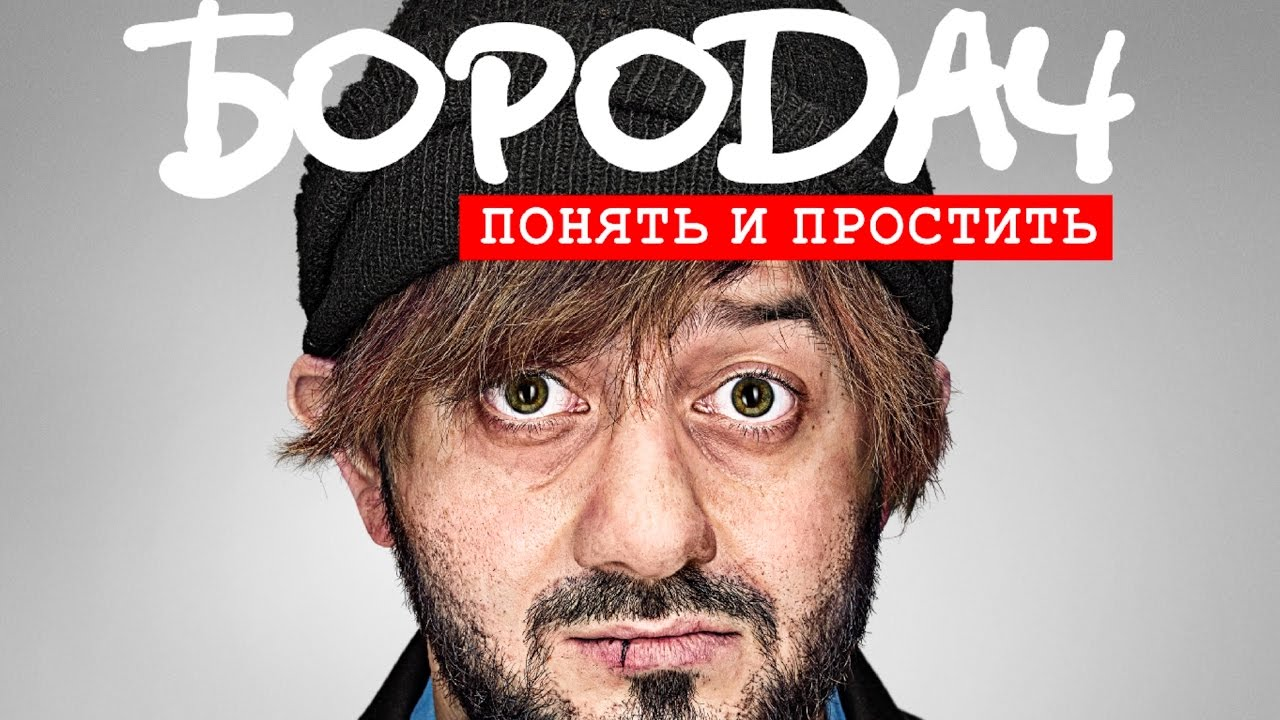

In [105]:
# INSERT - Adding new records to the database
query_insert = """
INSERT INTO orders (order_id, customer_id, amount, order_date)
VALUES (509, 4, 75.0, '2025-04-01');
"""

print("Before INSERT - Current orders:")
current_orders = pd.read_sql_query("SELECT * FROM orders ORDER BY order_id;", conn)
print(current_orders.tail(2))

print("\nInserting new order...")
conn.execute(query_insert)
conn.commit()

print("After INSERT:")
after_insert = pd.read_sql_query("SELECT * FROM orders ORDER BY order_id;", conn)
print(after_insert.tail(2))

Before INSERT - Current orders:
    order_id  customer_id  amount           order_date     product_category  \
80       181           20   99.51  2024-03-18 00:00:00     Sports Equipment   
81       182           20  188.13  2024-04-16 00:00:00  Musical Instruments   

   payment_method   shipping_method order_status  discount_applied  
80      ARCA Card  HayPost Standard    Completed                 5  
81      ARCA Card   Yerevan Express   Processing                 0  

Inserting new order...
After INSERT:
    order_id  customer_id  amount           order_date     product_category  \
81       182           20  188.13  2024-04-16 00:00:00  Musical Instruments   
82       509            4   75.00           2025-04-01                 None   

   payment_method  shipping_method order_status  discount_applied  
81      ARCA Card  Yerevan Express   Processing               0.0  
82           None             None         None               NaN  


In [61]:
customers

,customer_id,name,email,country,city,age,registration_date,customer_segment
0,1,Armen Sargsyan,armen.s@armmail.am,Armenia,Yerevan,56,2023-01-01 00:00:00.000000000,Basic
1,2,Anahit Hakobyan,anahit.h@haypost.am,Armenia,Gyumri,46,2023-02-08 10:06:18.947368421,Premium
2,3,Davit Grigoryan,davit.g@arca.am,Armenia,Vanadzor,32,2023-03-18 20:12:37.894736842,Basic
3,4,Sona Petrosyan,sona.p@armmail.am,Armenia,Yerevan,60,2023-04-26 06:18:56.842105264,Standard
4,5,Vahram Manukyan,vahram.m@ucom.am,Armenia,Kapan,25,2023-06-03 16:25:15.789473684,Standard
5,6,Karine Abrahamyan,karine.a@haypost.am,Armenia,Yerevan,38,2023-07-12 02:31:34.736842104,Premium
6,7,Tigran Avetisyan,tigran.av@gmail.com,Armenia,Goris,56,2023-08-19 12:37:53.684210528,Premium
7,8,Lilit Gevorgyan,lilit.g@armmail.am,Armenia,Sisian,36,2023-09-26 22:44:12.631578948,Standard
8,9,Hayk Khachatryan,hayk.kh@ucom.am,Armenia,Yerevan,40,2023-11-04 08:50:31.578947368,Standard
9,10,Lusine Vardanyan,lusine.v@arca.am,Armenia,Alaverdi,28,2023-12-12 18:56:50.526315788,Premium


In [106]:
# UPDATE - Modifying existing records
query_update = """
UPDATE customers 
SET country = 'Hayastan' 
WHERE country = 'Armenia';
"""

print("Before UPDATE - Current countries:")
before_update = pd.read_sql_query("SELECT DISTINCT country FROM customers;", conn)
print(before_update)

print("\nUpdating country names from 'Armenia' to 'Hayastan'...")
conn.execute(query_update)
conn.commit()

print("After UPDATE - Updated countries:")
after_update = pd.read_sql_query("SELECT DISTINCT country FROM customers;", conn)
print(after_update)

Before UPDATE - Current countries:
   country
0  Armenia
1  Artsakh

Updating country names from 'Armenia' to 'Hayastan'...
After UPDATE - Updated countries:
    country
0  Hayastan
1   Artsakh


In [ ]:
# DELETE - Removing records from the database
query_delete = """
DELETE FROM orders 
WHERE amount < 5;
"""

print("Before DELETE - Orders under $5:")
small_orders = pd.read_sql_query("SELECT * FROM orders WHERE amount < 5 ORDER BY amount;", conn)
print(small_orders)
print(f"Number of orders under $5: {len(small_orders)}")

print("\nDeleting small orders (< $5)...")
conn.execute(query_delete)
conn.commit()

print("After DELETE - Remaining orders:")
after_delete = pd.read_sql_query("SELECT * FROM orders ORDER BY order_id;", conn)
print(after_delete)
print(f"Total remaining orders: {len(after_delete)}")

Before DELETE - Orders under $5:
Empty DataFrame
Columns: [order_id, customer_id, amount, order_date, product_category, payment_method, shipping_method, order_status, discount_applied]
Index: []
Number of orders under $5: 0

Deleting small orders (< $5)...


### ⚠️ Data Modification Safety Tips

**Always be careful with data modification operations!**

#### 🛡️ Best Practices:
- **Always backup** your data before modifications
- **Test on small datasets** first
- **Use WHERE clauses** carefully to avoid updating/deleting wrong records
- **Use transactions** for multiple related operations
- **Double-check your WHERE conditions** before running

#### 💡 Safe Testing:
```sql
-- Before DELETE, always check what you're deleting:
SELECT * FROM orders WHERE amount < 60;  -- See what will be deleted

-- Before UPDATE, check what will be changed:
SELECT * FROM customers WHERE country = 'USA';  -- See what will be updated
```

Remember: **SQL modifications are permanent** - there's no "undo" button!

## 9. Date and Time Functions

In [109]:
query_date_aggregation = """
SELECT 
    strftime('%Y-%m', order_date) as month,
    COUNT(*) as orders_count,
    SUM(amount) as monthly_revenue,
    AVG(amount) as avg_order_value
FROM orders
GROUP BY strftime('%Y-%m', order_date)
ORDER BY month;
"""

print("\nMonthly Aggregation:")
pd.read_sql_query(query_date_aggregation, conn)



Monthly Aggregation:


,month,orders_count,monthly_revenue,avg_order_value
0,2024-01,5,784.84,156.968000
1,2024-02,7,1651.10,235.871429
2,2024-03,8,900.01,112.501250
3,2024-04,6,985.03,164.171667
4,2024-05,10,1929.23,192.923000
5,2024-06,6,805.88,134.313333
6,2024-07,4,499.18,124.795000
7,2024-08,7,773.31,110.472857
8,2024-09,4,498.23,124.557500
9,2024-10,12,2080.82,173.401667


## 10. Various Useful SQL Commands

In [ ]:
# DISTINCT - Get unique values (no duplicates)
query_distinct_countries = """
SELECT DISTINCT city 
FROM customers
ORDER BY city;
"""

print("🌍 Unique Cities:")
result = pd.read_sql_query(query_distinct_countries, conn)
print(result)

🌍 Unique Countries:
            city
0        Abovyan
1       Alaverdi
2       Artashat
3   Charentsavan
4        Dilijan
5          Goris
6         Gyumri
7        Hrazdan
8          Kapan
9          Sevan
10        Shushi
11        Sisian
12   Stepanakert
13      Vanadzor
14       Yerevan


In [113]:
# Value Counts - Count occurrences of each value
query_city_counts = """
SELECT city, COUNT(*) as customer_count
FROM customers
GROUP BY city
ORDER BY customer_count DESC;
"""

print("🌍 Customer Count by city:")
result = pd.read_sql_query(query_city_counts, conn)
print(result)

🌍 Customer Count by city:
            city  customer_count
0        Yerevan               6
1       Vanadzor               1
2    Stepanakert               1
3         Sisian               1
4         Shushi               1
5          Sevan               1
6          Kapan               1
7        Hrazdan               1
8         Gyumri               1
9          Goris               1
10       Dilijan               1
11  Charentsavan               1
12      Artashat               1
13      Alaverdi               1
14       Abovyan               1


In [ ]:
# NULL handling - Working with missing values
query_null_check = """
SELECT 
    COUNT(*) as total_customers,
    COUNT(email) as customers_with_email,
    COUNT(*) - COUNT(email) as customers_without_email
FROM customers;
"""

print("📧 Email Data Quality Check:")
result = pd.read_sql_query(query_null_check, conn)
print(result)

In [120]:
# String operations and pattern matching
query_like_patterns = """
SELECT name, email, city
FROM customers
WHERE name LIKE '%an%'  -- Names containing 'an'
ORDER BY name;
"""

# --

print("🔍 Names containing 'an':")
result = pd.read_sql_query(query_like_patterns, conn)
print(result)

🔍 Names containing 'an':
                 name                 email          city
0     Anahit Hakobyan   anahit.h@haypost.am        Gyumri
1   Aram Hovhannisyan      aram.h@gmail.com      Artashat
2     Arman Ghukasyan   arman.gh@armmail.am        Shushi
3      Armen Sargsyan    armen.s@armmail.am       Yerevan
4   Arusyak Mkrtchyan     arusyak.m@ucom.am       Hrazdan
5    Astghik Torosyan  astghik.t@haypost.am       Yerevan
6     Davit Grigoryan       davit.g@arca.am      Vanadzor
7     Gagik Stepanyan       gagik.s@arca.am       Yerevan
8    Gayane Mesropyan    gayane.m@gmail.com       Abovyan
9    Hayk Khachatryan       hayk.kh@ucom.am       Yerevan
10  Karine Abrahamyan   karine.a@haypost.am       Yerevan
11    Lilit Gevorgyan    lilit.g@armmail.am        Sisian
12   Lusine Vardanyan      lusine.v@arca.am      Alaverdi
13   Nvard Karapetyan    nvard.k@armmail.am  Charentsavan
14    Ruben Danielyan    ruben.d@haypost.am   Stepanakert
15  Siranush Badalyan  siranush.b@gmail.com    

In [ ]:
# Mathematical operations and rounding
query_math_ops = """
SELECT 
    order_id,
    amount,
    ROUND(amount, 0) as amount_rounded,
    FLOOR(amount) as amount_floor,
    amount * 1.2 as amount_with_tax
FROM orders
WHERE amount > 100
ORDER BY amount DESC
LIMIT 10;
"""

print("🧮 Mathematical Operations:")
result = pd.read_sql_query(query_math_ops, conn)
print(result)

In [121]:
# Conditional logic with CASE statements
query_customer_categories = """
SELECT 
    name,
    age,
    CASE 
        WHEN age < 25 THEN 'Young'
        WHEN age BETWEEN 25 AND 40 THEN 'Adult'
        WHEN age BETWEEN 41 AND 60 THEN 'Middle-aged'
        ELSE 'Senior'
    END as age_category,
    customer_segment,
    country
FROM customers
ORDER BY age;
"""

print("👥 Age Categories:")
result = pd.read_sql_query(query_customer_categories, conn)
print(result)

👥 Age Categories:
                 name  age age_category customer_segment   country
0    Astghik Torosyan   19        Young            Basic  Hayastan
1   Siranush Badalyan   20        Young            Basic  Hayastan
2     Vahram Manukyan   25        Adult         Standard  Hayastan
3    Lusine Vardanyan   28        Adult          Premium  Hayastan
4   Aram Hovhannisyan   28        Adult            Basic  Hayastan
5     Davit Grigoryan   32        Adult            Basic  Hayastan
6     Lilit Gevorgyan   36        Adult         Standard  Hayastan
7   Karine Abrahamyan   38        Adult          Premium  Hayastan
8     Arman Ghukasyan   39        Adult         Standard   Artsakh
9    Hayk Khachatryan   40        Adult         Standard  Hayastan
10   Nvard Karapetyan   41  Middle-aged         Standard  Hayastan
11    Gagik Stepanyan   41  Middle-aged         Standard  Hayastan
12   Vazgen Poghosyan   41  Middle-aged         Standard  Hayastan
13    Anahit Hakobyan   46  Middle-aged     

In [123]:
# Random sampling and limit variations
query_random_sample = """
SELECT *
FROM customers
ORDER BY RANDOM()
LIMIT 5;
"""

print("🎲 Random Sample of 5 Customers:")
result = pd.read_sql_query(query_random_sample, conn)
print(result)

🎲 Random Sample of 5 Customers:
   customer_id               name                 email   country  \
0           18   Astghik Torosyan  astghik.t@haypost.am  Hayastan   
1           10   Lusine Vardanyan      lusine.v@arca.am  Hayastan   
2           12   Nvard Karapetyan    nvard.k@armmail.am  Hayastan   
3           20   Gayane Mesropyan    gayane.m@gmail.com  Hayastan   
4            6  Karine Abrahamyan   karine.a@haypost.am  Hayastan   

           city  age           registration_date customer_segment  
0       Yerevan   19  2024-10-15 03:47:22.105263            Basic  
1      Alaverdi   28  2023-12-12 18:56:50.526315          Premium  
2  Charentsavan   41  2024-02-27 15:09:28.421052         Standard  
3       Abovyan   61         2024-12-31 00:00:00         Standard  
4       Yerevan   38  2023-07-12 02:31:34.736842          Premium  


In [124]:
# Data type conversions and casting
query_type_conversions = """
SELECT 
    order_id,
    amount,
    CAST(amount AS INTEGER) as amount_int,
    CAST(amount AS TEXT) as amount_text,
    printf('$%.2f', amount) as amount_formatted
FROM orders
LIMIT 10;
"""

print("🔄 Data Type Conversions:")
result = pd.read_sql_query(query_type_conversions, conn)
print(result)

🔄 Data Type Conversions:
   order_id  amount  amount_int amount_text amount_formatted
0       101   75.46          75       75.46           $75.46
1       102   87.25          87       87.25           $87.25
2       103   69.19          69       69.19           $69.19
3       104  239.62         239      239.62          $239.62
4       105  372.74         372      372.74          $372.74
5       106   32.26          32       32.26           $32.26
6       107   53.81          53       53.81           $53.81
7       108   92.08          92       92.08           $92.08
8       109   29.00          29        29.0           $29.00
9       110   42.47          42       42.47           $42.47


# 🛠️ Browser History

- GeeksforGeeks: [Get Browser History Using Python in Ubuntu](https://www.geeksforgeeks.org/python/get-browser-history-using-python-in-ubuntu/)
- Պատրաստի գրադարան։ [browser-history](https://github.com/browser-history/browser-history/)


In [ ]:

import shutil
import sqlite3
import pandas as pd
from pathlib import Path

PROFILE = Path(r"C:\Users\hayk_\AppData\Local\Google\Chrome\User Data\Default")
DB_FILE = PROFILE / "History"
COPY_FILE = PROFILE / "History_copy.db"  # we’ll query this copy

shutil.copy2(DB_FILE, COPY_FILE)
print(f"Copied history DB → {COPY_FILE}")

conn = sqlite3.connect(f"file:{COPY_FILE}?mode=ro", uri=True) # read-only

recent_sql = (
    "SELECT url, title, last_visit_time "
    "FROM urls ORDER BY last_visit_time DESC LIMIT 2;"
)
recent = pd.read_sql_query(recent_sql, conn)
print("\n🔹 Last 2 pages visited:")
recent[["last_visit_time", "title", "url"]]

conn.close()

Copied history DB → C:\Users\hayk_\AppData\Local\Google\Chrome\User Data\Default\History_copy.db

🔹 Last 2 pages visited:


,last_visit_time,title,url
0,13399146786660363,SQL FLOOR function error,https://chatgpt.com/c/68963022-b3dc-8322-b432-...
1,13399146780006370,ChatGPT,https://chatgpt.com/?model=gpt-4o


# 📚 [Սոնայի](https://www.anthropic.com/claude/sonnet) գեներացրած նյութ

Why SQL and not CSV files?

### **CSV vs SQL Database - When to use which**

#### 📄 CSV Files - Good when:

- **Small data** (< 1 million rows)
- **Simple analytics** - read-only operations
- **One-time analysis**
- **Data exchange** between different programs
- **Quick prototypes and experiments**

#### 🗄️ SQL Databases - Essential when:

- **Large data** (millions+ rows)
- **Multi-user environment** (concurrent users)
- **Data integrity** preservation (data integrity)
- **Complex queries** with JOINs and aggregate functions
- **Real-time applications** (web apps, APIs)
- **ACID properties** - Atomicity, Consistency, Isolation, Durability

#### 💡 Practical example
```python
# CSV - 1GB file is hard to process
df = pd.read_csv('huge_file.csv')  # Uses all RAM
result = df[df['amount'] > 1000].groupby('country').sum()

# SQL - only loads necessary data
query = "SELECT country, SUM(amount) FROM sales WHERE amount > 1000 GROUP BY country"
result = pd.read_sql_query(query, conn)  # Optimized, fast
```

## 🗂️ Database Types

### 🔄 Relational Databases (SQL)

#### 🐘 **PostgreSQL**
- **Good for:** complex queries, JSON support, extensions  
- **Used for:** web applications, analytics, geospatial data
- **Python:**  `psycopg2`, `SQLAlchemy`

#### 🐬 **MySQL/MariaDB** 
- **Good for:** web development, high performance, easy setup
- **Used for:** WordPress, e-commerce, social media
- **Python:** `PyMySQL`, `mysql-connector-python`

#### 🪶 **SQLite**
- **Good for:** embedded apps, development, small projects
- **Used for:** mobile apps, desktop software, prototyping  
- **Python:** `sqlite3` (built-in)

#### 🏢 **Enterprise Solutions**
- **Oracle, SQL Server, IBM DB2** - large corporations
- **SAP HANA** - real-time analytics

### 📊 NoSQL Databases (Non-relational)

#### 📄 **Document Stores**
- **MongoDB** - JSON-like documents
- **CouchDB** - distributed document storage

#### 🔑 **Key-Value Stores**  
- **Redis** - in-memory caching, sessions
- **Amazon DynamoDB** - cloud-native, serverless

#### 📈 **Column-Family**
- **Cassandra** - distributed, high availability
- **HBase** - Hadoop ecosystem

#### 🕸️ **Graph Databases**
- **Neo4j** - social networks, recommendation engines
- **Amazon Neptune** - cloud graph database

### 🤝 SQL vs NoSQL - When to use which

| Aspect | SQL | NoSQL |
|--------|-----|--------|
| **Data Structure** | Tables, rows, columns | Documents, key-value, graphs |
| **Schema** | Fixed schema | Flexible/dynamic schema |  
| **ACID** | Full ACID compliance | Eventually consistent |
| **Scaling** | Vertical (expensive) | Horizontal (cheaper) |
| **Complex Queries** | Excellent (JOINs) | Limited |
| **Learning Curve** | Standard SQL | Database-specific |

#### 💡 **Selection Guidelines**
```python
# ✅ Choose SQL when
- Well-defined data structure
- Complex relationships between entities  
- ACID transactions are critical
- Team knows SQL well
- Reporting and analytics are important

# ✅ Choose NoSQL when  
- Rapid development and iteration
- Massive scale (millions of users)
- Unstructured or semi-structured data
- Real-time applications
- Microservices architecture
```

### 🛠️ Database Connections in Python

```python
# SQLite (built-in)
import sqlite3
conn = sqlite3.connect('database.db')

# PostgreSQL  
import psycopg2
conn = psycopg2.connect("host=localhost dbname=mydb user=myuser")

# MySQL
import mysql.connector
conn = mysql.connector.connect(host='localhost', database='mydb')

# MongoDB (NoSQL)
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')

# Redis (NoSQL)
import redis
r = redis.Redis(host='localhost', port=6379)
```

# 🎲 30
- ▶️[The Pursuit of Wonder (Bukowski)](https://www.youtube.com/watch?v=eMTDAHK-tkE)
- 🔗[Random link](https://www.youtube.com/shorts/rH7r85UwJSg)
- 🇦🇲🎶[The Bambir](https://www.youtube.com/watch?v=ZiDJr5A8HUI)
- 🌐🎶[Opa Tsupa](https://www.youtube.com/watch?v=AuFiBjNTB9o)
- 🤌[Կարգին](https://www.youtube.com/watch?v=smPgnvUoJtU)


<a href="http://s01.flagcounter.com/more/1oO"><img src="https://s01.flagcounter.com/count2/1oO/bg_FFFFFF/txt_000000/border_CCCCCC/columns_2/maxflags_10/viewers_0/labels_0/pageviews_1/flags_0/percent_0/" alt="Flag Counter"></a>
